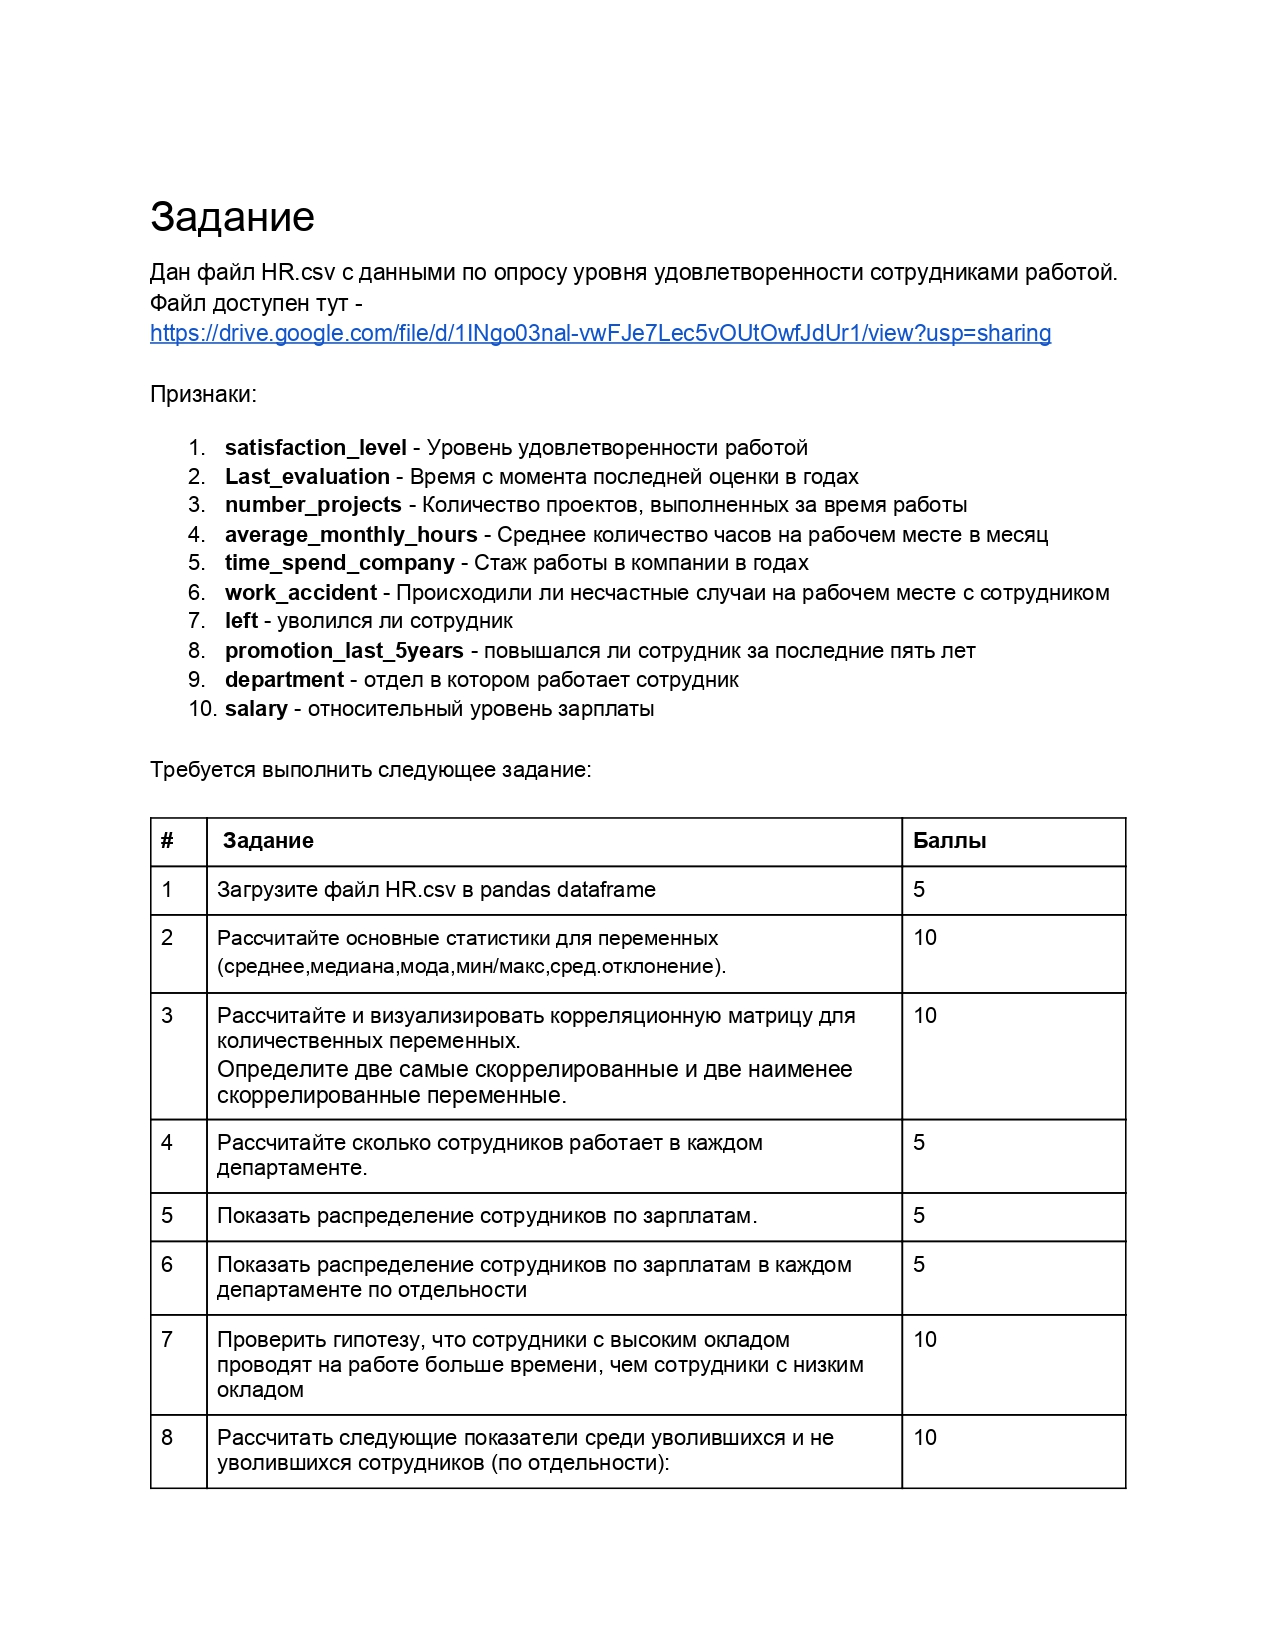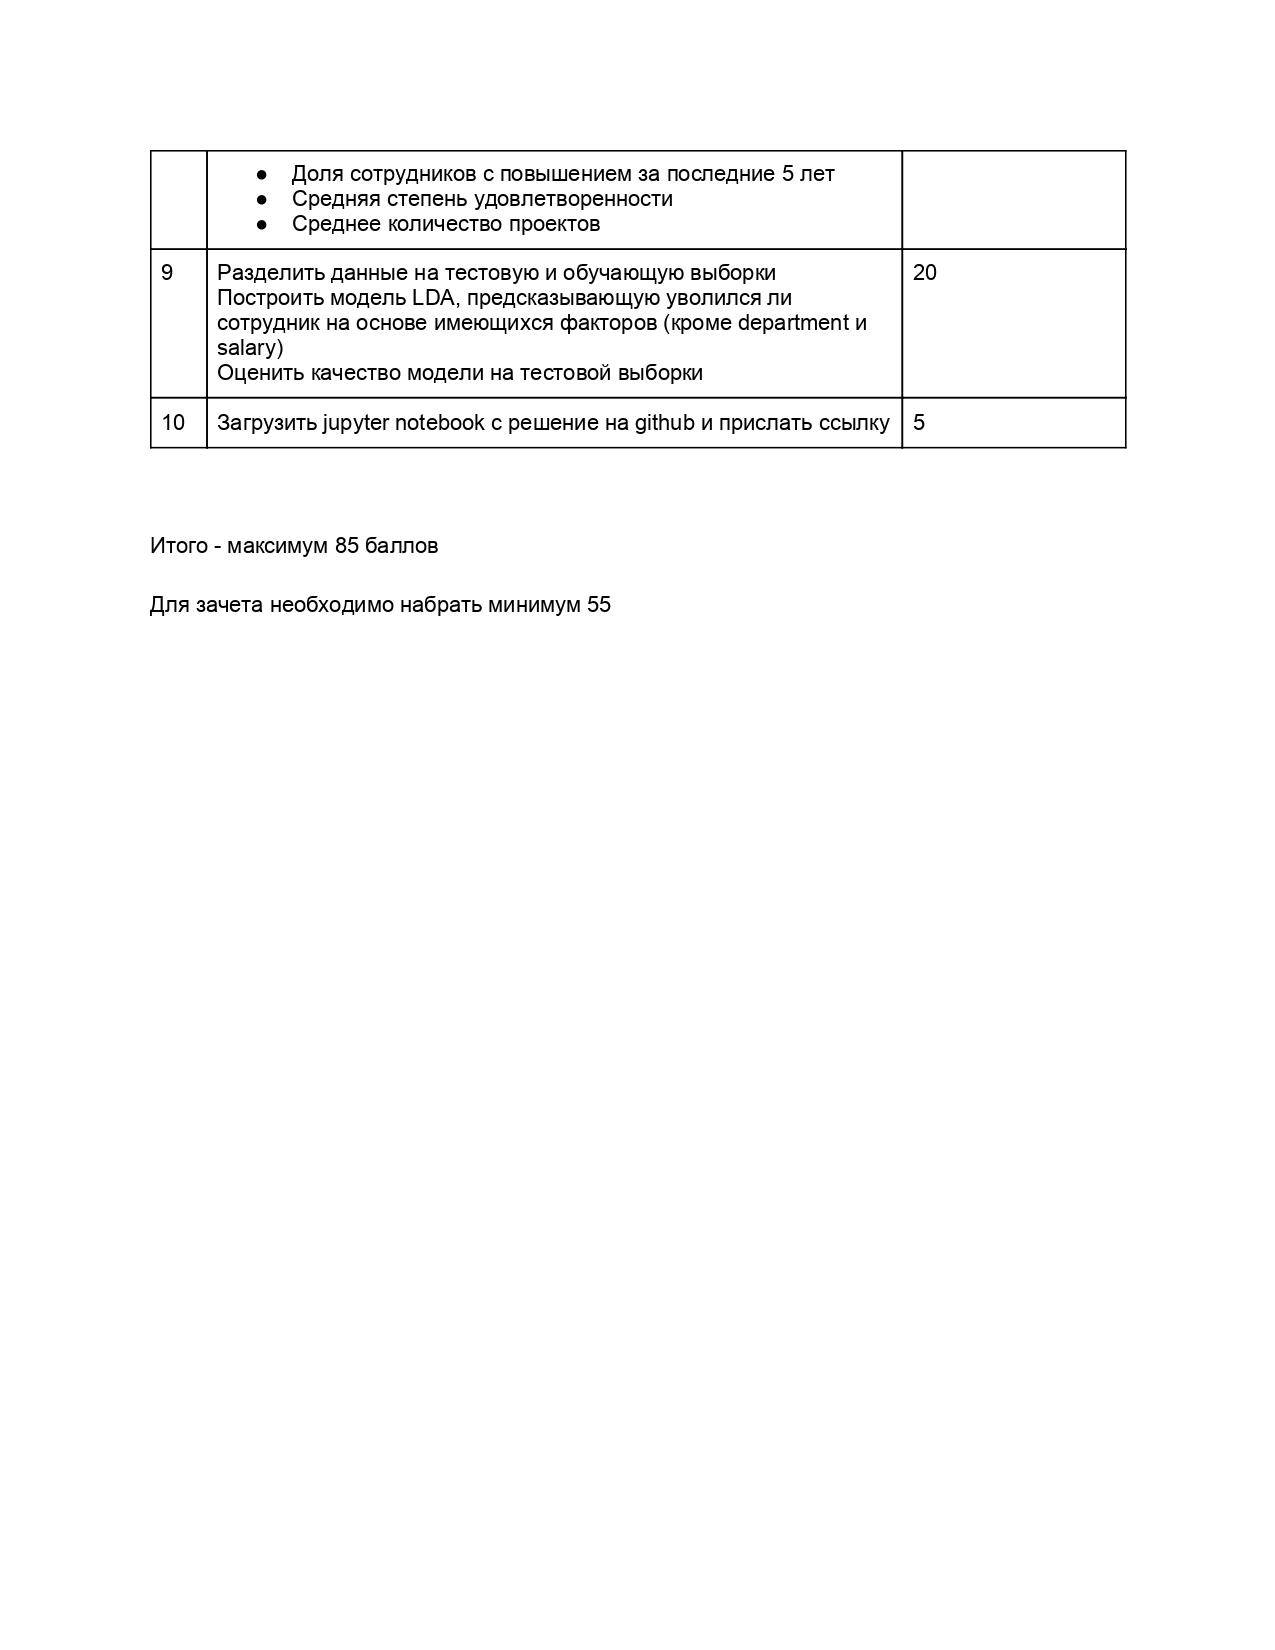

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
#Загружаю датафрейм
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


В датафрейме нет пропусков, можно работать без каких-либо предобработок

In [ ]:
#Рассчитаю основные статистики для количественных переменных с помощью метода describe.
#Второй квартиль (50%) является медианой
df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [ ]:
#Рассчитаю моду для всех признаков
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Рассчитаю корреляционную матрицу для количественных переменных по методу Пирсона
df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


<Axes: >

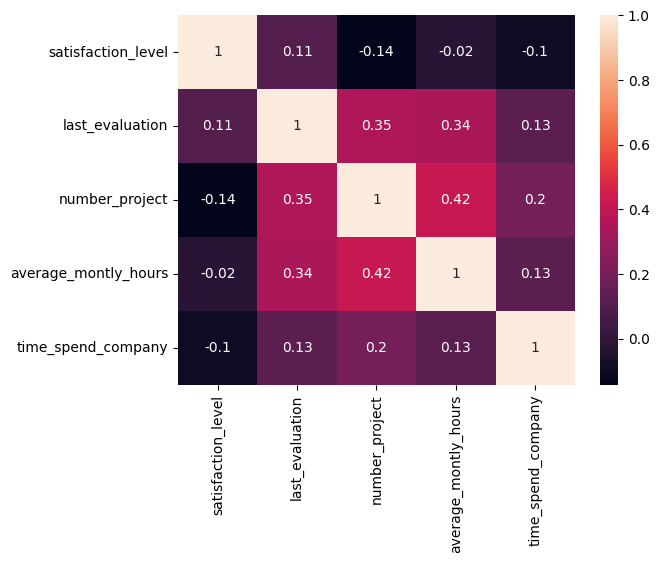

In [ ]:
#Построю тепловую карту для наглядности
sns.heatmap(df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].corr(), annot = True)

По результатам расчета коэффициента корреляции Пирсона и визуализации матрицы корреляции видно, что две наиболее скоррелированные переменные это:

- среднее кол-во часов на рабочем месте в месяц и количество проектов, выполненных за время работы, с коэф-том корреляции 0.42
- кол-во проектов, выполненных за время работы, и время с момента последней оценки с коэф-том корреляции 0.35

Две наименее скоррелированные переменные это:

- среднее кол-во часов на рабочем месте в месяц и уровень удовлетворенности работой с коэф-том корреляции -0.02
- стаж работы в компании и уровень удовлетворенности работой с коэф-том корреляции -0.1 


In [ ]:
#Рассчитаю, сколько сотрудников работает в каждом департаменте
df.groupby('department')['satisfaction_level'].count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: satisfaction_level, dtype: int64

Text(0.5, 1.0, 'Распределение зарплат сотрудников по всем департаментам')

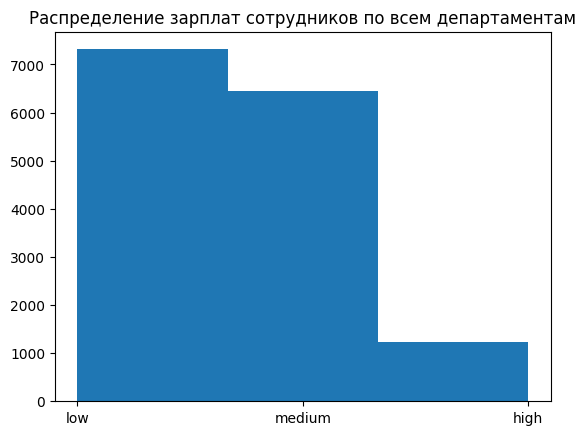

In [ ]:
#Распределение сотрудников по зарплатам по всем департаментам
plt.hist(df['salary'], bins = 3)
plt.title('Распределение зарплат сотрудников по всем департаментам')

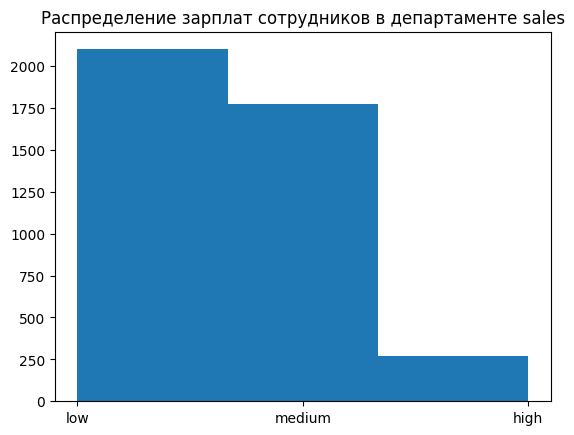

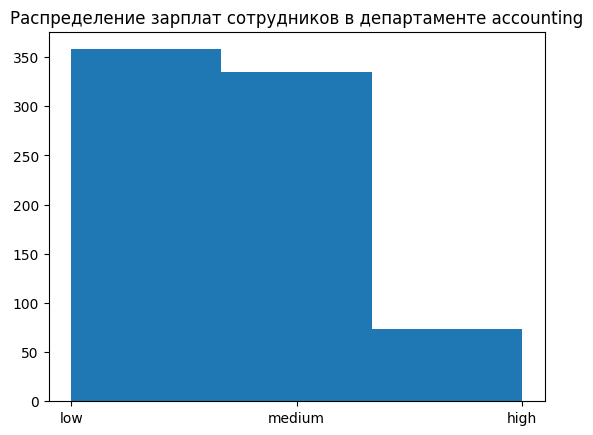

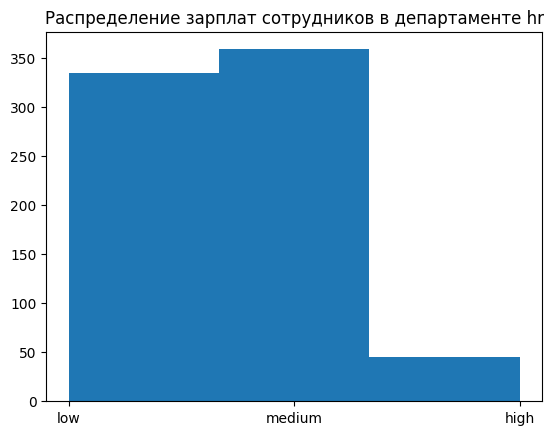

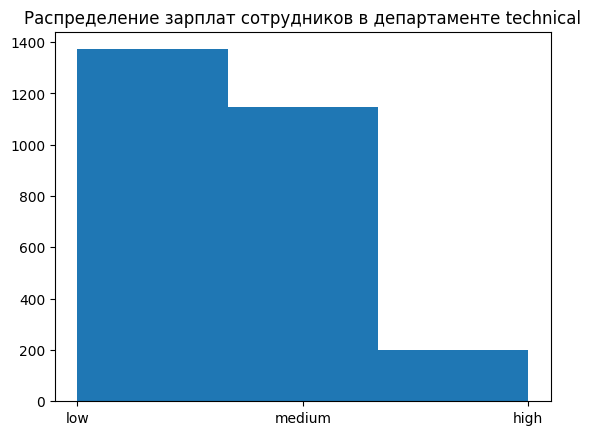

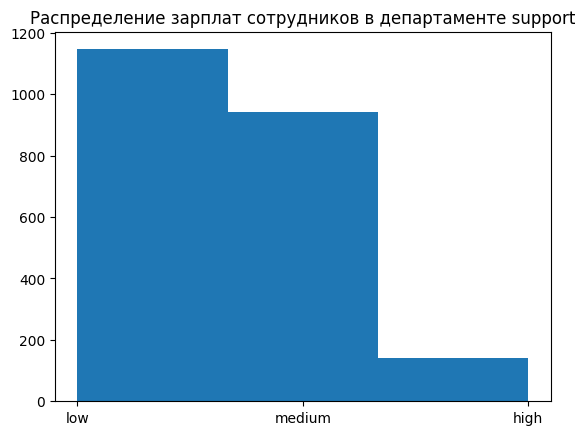

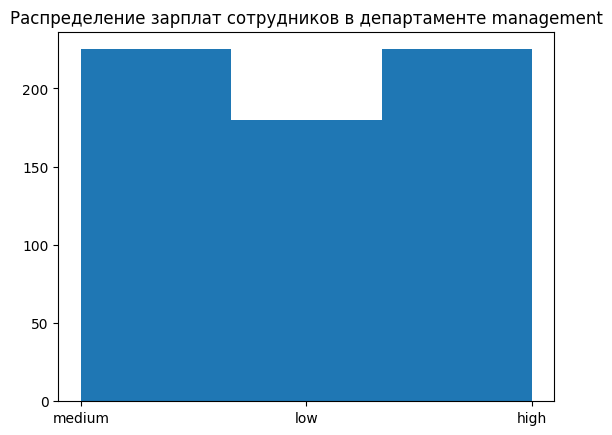

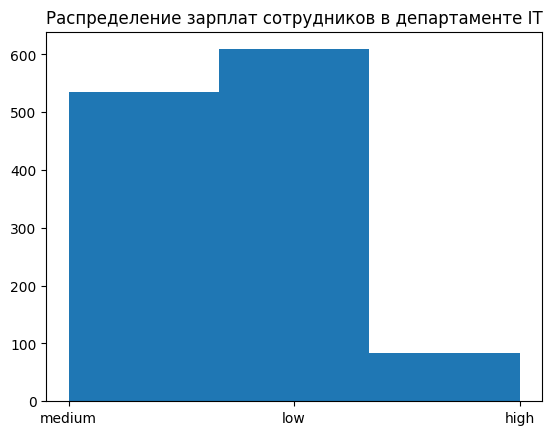

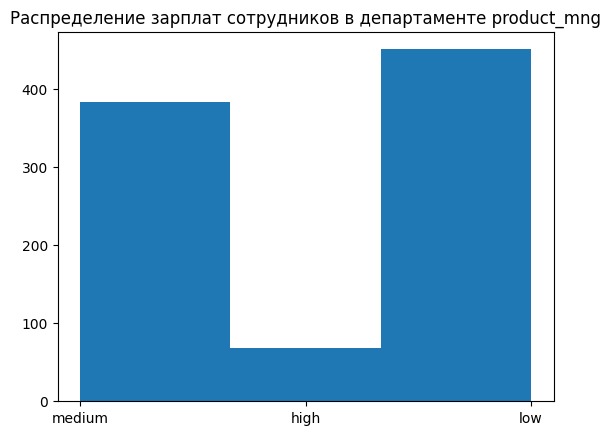

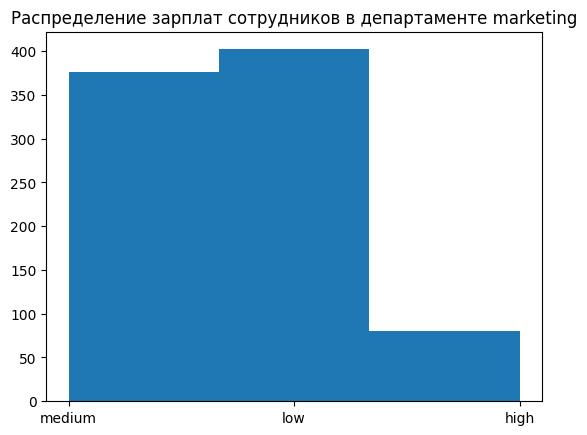

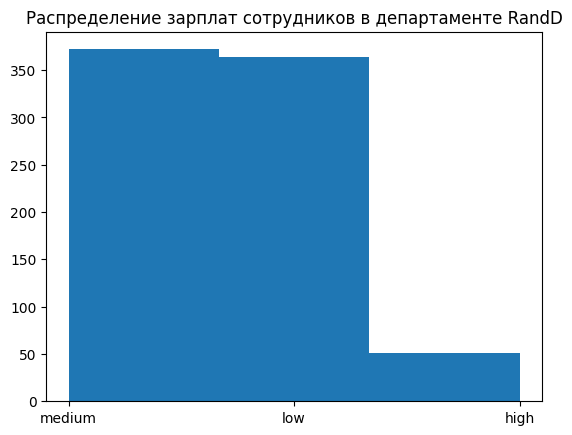

In [ ]:
for department in list(df['department'].unique()):
  plt.hist(df[df['department'] == department]['salary'], bins = 3)
  plt.title('Распределение зарплат сотрудников в департаменте ' + department)
  plt.show()

In [ ]:
#ВОПРОС - как сделать так, чтобы на всех графиках в цикле по оси Х относительные зарплаты откладывались в одинаковом порядке: low -> medium -> high

Проверю гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

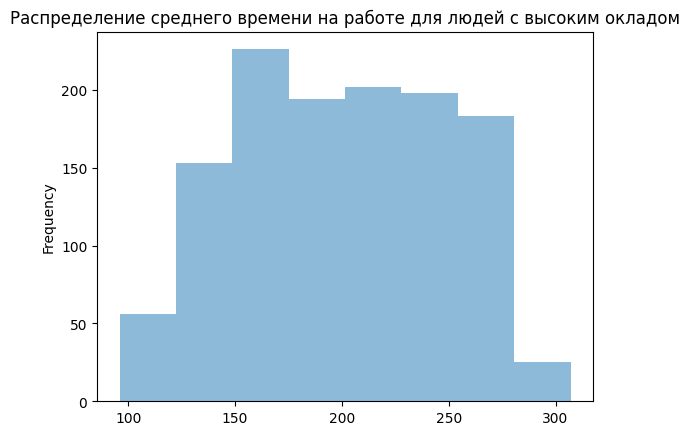

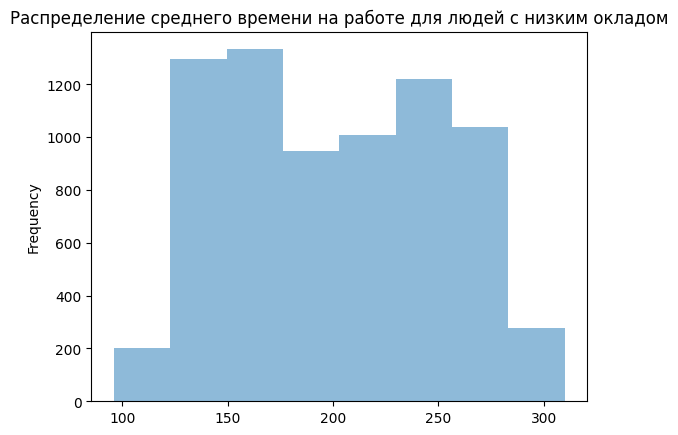

In [11]:
#Прежде всего, посмотрю на распределение времени на работе для сотрудников с высоким окладом и для сотрудников с низким окладом
df[df['salary'] == 'high']['average_montly_hours'].plot(kind = 'hist',
                                                        alpha = 0.5,
                                                        bins = 8)
plt.title('Распределение среднего времени на работе для людей с высоким окладом')
plt.show()
df[df['salary'] == 'low']['average_montly_hours'].plot(kind = 'hist',
                                                        alpha = 0.5,
                                                        bins = 8)
plt.title('Распределение среднего времени на работе для людей с низким окладом')
plt.show()

По графикам распределения, на мой взгляд, видно, что данные имеют не совсем нормальное распределение, во всяком случае, распределение времени на работе для сотрудников с низкой зарплатой. При этом для сотрудников с высокой зарплатой распределение имеет гораздо более похожее на нормальное вид. Поэтому воспользуюсь критерием Манна-Уитни, поскольку он является непараметрическим аналогом критерием Стьюдента для выборок, у которых распределение не имеет нормальный вид.

In [24]:
data1 = df[df['salary'] == 'high']['average_montly_hours']
data2 = df[df['salary'] == 'low']['average_montly_hours']

stat, p = st.mannwhitneyu(data1, data2)
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые. Значение p =', p)
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются. Значение p =', p)

Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые. Значение p = 0.8241330720858693


Таким образом, можно сказать, что, скорее всего, сотрудники с высоким окладом и сотрудники с низким окладом в среднем проводят одинаковое количество времени на работе.

In [29]:
#Доля сотрудников с повышением за последние 5 лет среди уволившихся сотрудников
df[(df['left'] == 1)&(df['promotion_last_5years'] == 1)]['left'].count()/df[df['left'] == 1]['left'].count()

0.005320638476617194

In [30]:
#Доля сотрудников с повышением за последние 5 лет среди не уволившихся сотрудников
df[(df['left'] == 0)&(df['promotion_last_5years'] == 1)]['left'].count()/df[df['left'] == 0]['left'].count()

0.026251312565628283

In [34]:
#Средняя степень удовлетворенности среди уволившихся сотрудников
df[df['left'] == 1]['satisfaction_level'].mean()

0.4400980117614114

In [35]:
#Средняя степень удовлетворенности среди не уволившихся сотрудников
df[df['left'] == 0]['satisfaction_level'].mean()

0.666809590479524

In [36]:
#Среднее количество проектов среди уволившихся сотрудников
df[df['left'] == 1]['number_project'].mean()

3.8555026603192384

In [37]:
#Среднее количество проектов среди не уволившихся сотрудников
df[df['left'] == 0]['number_project'].mean()

3.786664333216661

Построю модель предсказания увольнения сотрудника по имеющимся признакам с помощью линейно-дискриминантного анализа (LDA).

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']], df['left'].to_numpy(), random_state=42)

In [71]:
len(y_test)

3750

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [6]:
lda = LinearDiscriminantAnalysis()

In [7]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [75]:
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [76]:
len(lda.predict(X_test))

3750

In [77]:
#Формирую таблицу с тестовыми значениями y и предсказаниями модели для наглядности
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [78]:
result

,0,1
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
3745,0,0
3746,1,0
3747,0,0
3748,0,1


In [8]:
from sklearn.metrics import accuracy_score

In [81]:
#Точность предсказания
accuracy_score(y_test, lda.predict(X_test))

0.7536

In [45]:
#Визуализирую полученную модель по двум признакам
small_train = X_train[['satisfaction_level', 'average_montly_hours']]
small_test = X_test[['satisfaction_level', 'average_montly_hours']]

In [46]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, y_train)

LinearDiscriminantAnalysis()

In [47]:
#Построю центры классов на графике
lda_small.means_

array([[  0.66827755, 198.83183673],
       [  0.43747195, 207.74495138]])

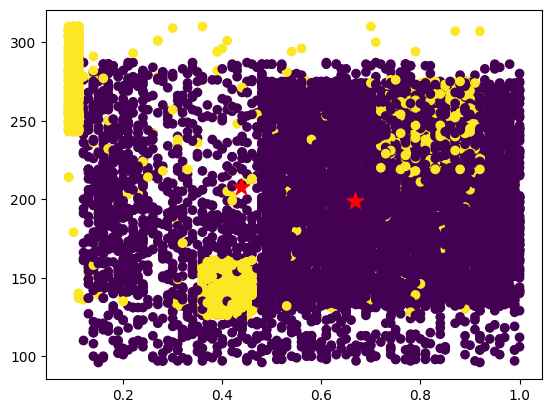

In [48]:
plt.scatter(small_train['satisfaction_level'], small_train['average_montly_hours'], c=y_train)
# центры классов
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

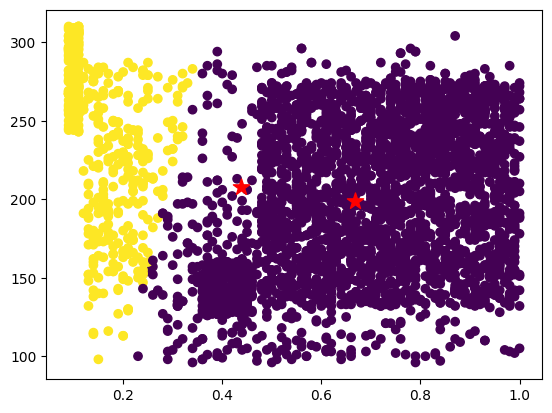

In [49]:
# визуализация разделения на тесте
plt.scatter(small_test['satisfaction_level'], small_test['average_montly_hours'], c=lda_small.predict(small_test))
# центры классов
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

Accuracy_score показал достаточно среднее значение качества предсказаний - 0.7536, которое подтверждается визуализациями. Скорее всего, следует либо дополнить модель другими признаками, либо использовать другой способ классификации, либо не полагаться слишком сильно на данную модель при принятии управленческих решений.